In [338]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt


In [339]:
#estimators
from sklearn.ensemble import RandomForestRegressor

In [340]:
from sklearn.linear_model import LinearRegression

In [341]:
from sklearn.svm import SVR
from sklearn import linear_model

In [342]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [343]:
#cross validation
from sklearn.cross_validation import train_test_split

In [344]:
#data

In [345]:
rawData = pd.read_csv(r"C:\Users\rjsie\Desktop\default.csv", header=1)

In [346]:
rawData = rawData.rename(columns={'default payment next month':'default'})

In [347]:
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [348]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [349]:
rawData.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [350]:
#Select Features

In [351]:
features = rawData.iloc[:, 1:24]

In [352]:
print('Summary of feature sample')

Summary of feature sample


In [353]:
features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [354]:
#select dependent variables

In [355]:
depVar = rawData['default']

In [356]:
depVar.head()

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [357]:
depVar.head()

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [358]:
#Establish the training set for the X-variables of Feature space (first 1000 rows: only for this example you will still follow a 70/30 split for the finl models)

In [359]:
X_train = (features[: 30000])

In [360]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [361]:
# Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)

In [362]:
#Dependent Variable Training Set (Y Training)

In [363]:
y_train = depVar[: 30000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:', str(y_train_count))

The number of observations in the Y training set are: 30000


In [364]:
y_train.head()

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [365]:
#Testing Set (X Testing)

In [366]:
X_test = depVar[-10000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:', str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 10000
20000    1
20001    0
20002    0
20003    0
20004    0
Name: default, dtype: int64


In [367]:
# Establish Ground Truth

In [368]:
#Ground Truth (y_test)

In [369]:
y_test = depVar[-10000:]

In [370]:
y_test_count = len(y_test.index)

In [371]:
print('The number of observations in the Y training set are:', str(y_test_count))

The number of observations in the Y training set are: 10000


In [372]:
y_test.head()

20000    1
20001    0
20002    0
20003    0
20004    0
Name: default, dtype: int64

In [373]:
#Cross Validation

In [374]:
from sklearn.cross_validation import train_test_split

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [376]:
X_train.shape, X_test.shape

((22500, 23), (7500, 23))

In [377]:
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [378]:
#X_train.shape, X_test.shape

In [379]:
from sklearn.linear_model import LinearRegression

In [380]:
model = LinearRegression(n_jobs=10)

In [381]:
#models

In [382]:
modelSVR = SVR()

In [383]:
modelRF = RandomForestRegressor()

In [384]:
modelLR = LinearRegression()

In [385]:
from sklearn import datasets

In [386]:
from sklearn.naive_bayes import GaussianNB

In [387]:
modelNB = GaussianNB()

In [388]:
#features

In [389]:
features = rawData.iloc[:, 1:24]

In [390]:
print('Summary of Feature Sample')

Summary of Feature Sample


In [391]:
features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [392]:
#dependent variable

In [393]:
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64


In [394]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [395]:
#Random Forest

In [396]:
modelRF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [397]:
#Support Vector Regression

In [398]:
modelSVR.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [399]:
modelLR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [400]:
from sklearn.model_selection import cross_val_score

In [401]:
#Random Forest Regression Model Fitting and Scoring

In [402]:
#Model Fitting

In [403]:
modelRF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [404]:
print(cross_val_score(modelRF, X_train, y_train))

[0.11572733 0.11451334 0.11134063]


In [405]:
#Support Vector Regression Model Fitting and Scoring

In [406]:
modelSVR.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [407]:
print(cross_val_score(modelSVR, X_train, y_train))

[-0.01969368 -0.02243776 -0.01672056]


In [408]:
modelRF.score(X_train, y_train)

0.8398778149873847

In [409]:
modelRF.score(X_test, y_test)

0.12531107043341028

In [410]:
modelSVR.score(X_train, y_train)

0.9262772957172896

modelSVR.score(X_test, y_test)

In [606]:
modelSVR.score(X_test, y_test)

-0.02291379137950811

In [411]:
#Linear Regression Model Fitting and Scoring

In [412]:
modelLR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [413]:
print(cross_val_score(modelLR, X_train, y_train))

[0.12312245 0.11677973 0.11192274]


In [414]:
modelLR.score(X_train, y_train)

0.11942277831474779

In [415]:
modelLR.score(X_test, y_test)

0.13705048353568705

In [416]:
modelNB.fit(X_train, y_train)

GaussianNB(priors=None)

In [417]:
print(cross_val_score(modelNB, X_train, y_train))

[0.40834555 0.36346667 0.39365249]


In [605]:
modelNB.score(X_test, y_test)

0.3841333333333333

In [418]:
#Making Predictions

In [419]:
predictions_RF = modelRF.predict(X_test)

In [420]:
predictions_SVR = modelSVR.predict(X_test)

In [421]:
predictions_LR = modelLR.predict(X_test)

In [422]:
predictions_NB = modelNB.predict(X_test)

In [423]:
#Evaluating the results

In [424]:
from sklearn.metrics import mean_squared_error

In [425]:
from sklearn.metrics import r2_score

In [426]:
from math import sqrt

In [427]:
rmse_RF=sqrt(mean_squared_error(y_test, predictions_RF))

In [428]:
rmse_SVR=sqrt(mean_squared_error(y_test, predictions_SVR))

In [429]:
rmse_LR=sqrt(mean_squared_error(y_test, predictions_LR))

In [430]:
rmse_NB=sqrt(mean_squared_error(y_test, predictions_NB))

In [431]:
predRsquared_RF = r2_score(y_test, predictions_RF)

In [432]:
predRsquared_SVR = r2_score(y_test, predictions_SVR)

In [433]:
predRsquared_LR = r2_score(y_test, predictions_LR)

In [434]:
predRsquared_NB = r2_score(y_test, predictions_NB)

In [435]:
print('R Squared_RF: %.3f' % predRsquared_RF)

R Squared_RF: 0.125


In [436]:
print('R Squared_SVR: %.3f' % predRsquared_SVR)

R Squared_SVR: -0.023


In [437]:
print('R Squared_LR: %.3f' % predRsquared_LR)

R Squared_LR: 0.137


In [438]:
print('R Squared_LR: %.3f' % predRsquared_NB)

R Squared_LR: -2.572


In [439]:
print('RMSE_RF: %.3f' % rmse_RF)

RMSE_RF: 0.388


In [440]:
print('RMSE_SVR: %.3f' % rmse_SVR)

RMSE_SVR: 0.420


In [441]:
print('RMSE_LR: %.3f' % rmse_LR)

RMSE_LR: 0.386


In [442]:
print('RMSE_NB: %.3f' % rmse_NB)

RMSE_NB: 0.785


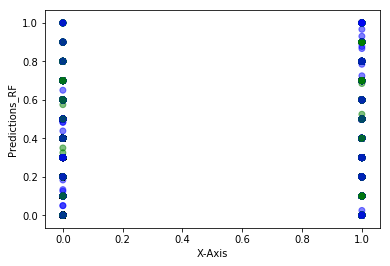

In [443]:
plt.scatter(y_test, predictions_RF, color=['blue','green'], alpha = 0.5)
plt.xlabel('X-Axis')
plt.ylabel('Predictions_RF')
plt.show();

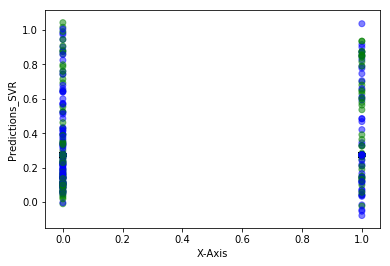

In [444]:
plt.scatter(y_test, predictions_SVR, color=['blue','green'], alpha = 0.5)
plt.xlabel('X-Axis')
plt.ylabel('Predictions_SVR')
plt.show();

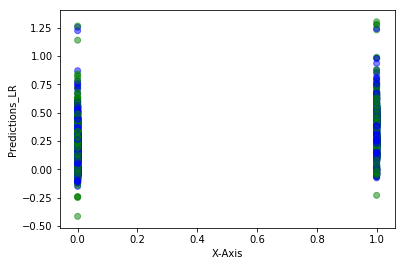

In [445]:
plt.scatter(y_test, predictions_LR, color=['blue','green'], alpha = 0.5)
plt.xlabel('X-Axis')
plt.ylabel('Predictions_LR')
plt.show();

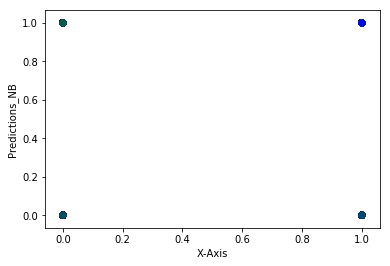

In [446]:
plt.scatter(y_test, predictions_NB, color=['blue','green'], alpha = 0.5)
plt.xlabel('X-Axis')
plt.ylabel('Predictions_NB')
plt.show();

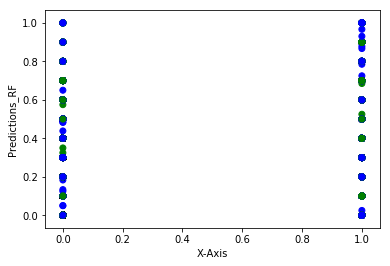

In [447]:
plt.scatter(y_test, predictions_RF, color=['blue','green'], alpha = 1.0)
plt.xlabel('X-Axis')
plt.ylabel('Predictions_RF')
plt.show();

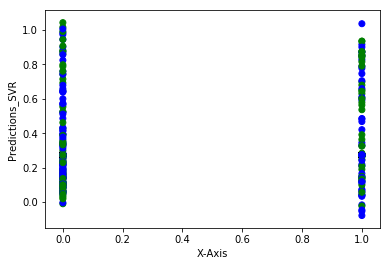

In [448]:
plt.scatter(y_test, predictions_SVR, color=['blue','green'], alpha = 1.0)
plt.xlabel('X-Axis')
plt.ylabel('Predictions_SVR')
plt.show();

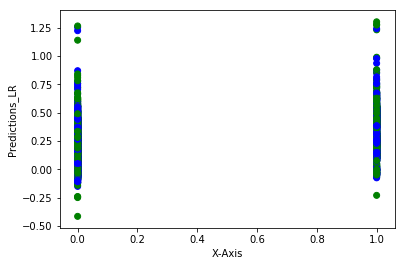

In [449]:
plt.scatter(y_test, predictions_LR, color=['blue','green'], alpha = 1.0)
plt.xlabel('X-Axis')
plt.ylabel('Predictions_LR')
plt.show();

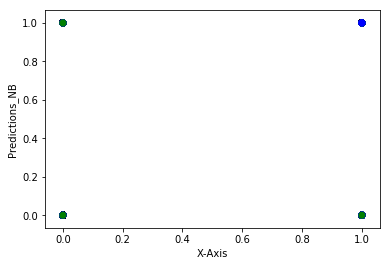

In [450]:
plt.scatter(y_test, predictions_NB, color=['blue','green'], alpha = 1.0)
plt.xlabel('X-Axis')
plt.ylabel('Predictions_NB')
plt.show();











In [451]:
rawData.cov()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,7.500250e+07,2.941664e+07,78.356379,268.154338,-131.452515,1491.057019,-297.572636,-116.276959,-191.692156,-27.691323,...,2.248126e+07,8.795803e+06,8.628506e+06,1.397501e+06,1.677383e+06,5.969803e+06,1.057334e+06,8.629502e+04,4.618460e+05,-50.151705
LIMIT_BAL,2.941664e+07,1.683446e+10,1571.050630,-22474.028945,-7323.669658,173076.722569,-39545.930009,-46037.648360,-44432.253315,-40571.811859,...,2.453926e+09,2.331481e+09,2.243837e+09,4.195711e+08,5.333504e+08,4.801180e+08,4.131202e+08,4.305657e+08,5.065153e+08,-8267.551759
SEX,7.835638e+01,1.571051e+03,0.239247,0.005502,-0.008014,-0.409726,-0.031685,-0.041442,-0.038694,-0.034411,...,-6.884896e+02,-5.056943e+02,-4.874302e+02,-1.964266e+00,-1.567550e+01,-7.403481e+01,-1.708011e+01,-1.245881e+01,-2.405188e+01,-0.008113
EDUCATION,2.681543e+02,-2.247403e+04,0.005502,0.624651,-0.059184,1.275380,0.093584,0.115025,0.107861,0.100528,...,-2.294883e+01,-3.635777e+02,-4.282742e+02,-4.903302e+02,-5.470050e+02,-5.558343e+02,-4.732070e+02,-4.873359e+02,-5.226734e+02,0.009187
MARRIAGE,-1.314525e+02,-7.323670e+03,-0.008014,-0.059184,0.272452,-1.992764,0.011683,0.015122,0.020421,0.020213,...,-7.838816e+02,-8.058409e+02,-6.592233e+02,-5.169161e+01,-9.732797e+01,-3.254608e+01,-1.035182e+02,-9.607709e+00,-6.162327e+01,-0.005273
AGE,1.491057e+03,1.730767e+05,-0.409726,1.275380,-1.992764,84.969755,-0.408639,-0.553408,-0.585263,-0.535851,...,3.045311e+04,2.765407e+04,2.613765e+04,3.992042e+03,4.626862e+03,4.746824e+03,3.087324e+03,3.218052e+03,3.191904e+03,0.053143
PAY_0,-2.975726e+02,-3.954593e+04,-0.031685,0.093584,0.011683,-0.408639,1.262930,0.904330,0.772384,0.707972,...,1.295025e+04,1.234167e+04,1.184476e+04,-1.475495e+03,-1.815138e+03,-1.396168e+03,-1.126848e+03,-9.991077e+02,-1.172194e+03,0.151499
PAY_2,-1.162770e+02,-4.603765e+04,-0.041442,0.115025,0.015122,-0.553408,0.904330,1.433254,1.098371,0.926680,...,1.711630e+04,1.611095e+04,1.564288e+04,-1.600241e+03,-1.627192e+03,-1.178331e+03,-8.788439e+02,-6.784685e+02,-7.768350e+02,0.130960
PAY_3,-1.916922e+02,-4.443225e+04,-0.038694,0.107861,0.020421,-0.585263,0.772384,1.098371,1.432492,1.087761,...,1.749410e+04,1.638295e+04,1.584709e+04,2.566847e+01,-1.841953e+03,-1.123429e+03,-8.637622e+02,-6.557960e+02,-7.630260e+02,0.116867
PAY_4,-2.769132e+01,-4.057181e+04,-0.034411,0.100528,0.020213,-0.535851,0.707972,0.926680,1.087761,1.366885,...,1.849642e+04,1.726555e+04,1.665159e+04,-1.812956e+02,-5.235817e+01,-1.425205e+03,-7.960357e+02,-5.999916e+02,-5.521373e+02,0.105115


In [452]:
covariance_matrix = np.cov(rawData, rowvar=0)

In [453]:
covariance_matrix

array([[ 7.50025000e+07,  2.94166409e+07,  7.83563785e+01,
         2.68154338e+02, -1.31452515e+02,  1.49105702e+03,
        -2.97572636e+02, -1.16276959e+02, -1.91692156e+02,
        -2.76913230e+01, -2.17860029e+02, -2.01877379e+02,
         1.23644654e+07,  1.10839192e+07,  1.46268798e+07,
         2.24812643e+07,  8.79580299e+06,  8.62850636e+06,
         1.39750097e+06,  1.67738345e+06,  5.96980287e+06,
         1.05733431e+06,  8.62950175e+04,  4.61846047e+05,
        -5.01517051e+01],
       [ 2.94166409e+07,  1.68344557e+10,  1.57105063e+03,
        -2.24740289e+04, -7.32366966e+03,  1.73076723e+05,
        -3.95459300e+04, -4.60376484e+04, -4.44322533e+04,
        -4.05718119e+04, -3.66705623e+04, -3.50930834e+04,
         2.72701997e+09,  2.57013019e+09,  2.54853316e+09,
         2.45392576e+09,  2.33148108e+09,  2.24383722e+09,
         4.19571137e+08,  5.33350409e+08,  4.80117965e+08,
         4.13120196e+08,  4.30565689e+08,  5.06515298e+08,
        -8.26755176e+03],
    

In [454]:
import seaborn as sns

In [455]:
#sns.pairplot(rawData, kind='reg')

In [456]:
import seaborn as sns

In [457]:
#sns.pairplot(rawData, kind='reg')

In [458]:
# Covariance measures how much 2x variables change together

In [459]:
# The Overall probability of default payment can be expressed as

In [460]:
rawData.default.sum() / len(rawData.default)

0.2212

In [461]:
rawData = rawData.rename(columns={'default payment next month':'default'})

In [462]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [463]:
rawData.default.sum() / len(rawData.default)

0.2212

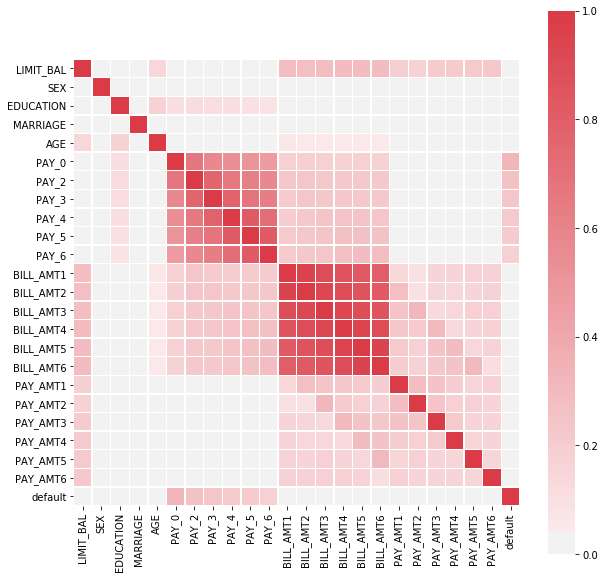

In [464]:
corr = rawData.drop('ID', axis=1).corr()
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=0, vmax=1, center=0, square=True, linewidth=0.5)

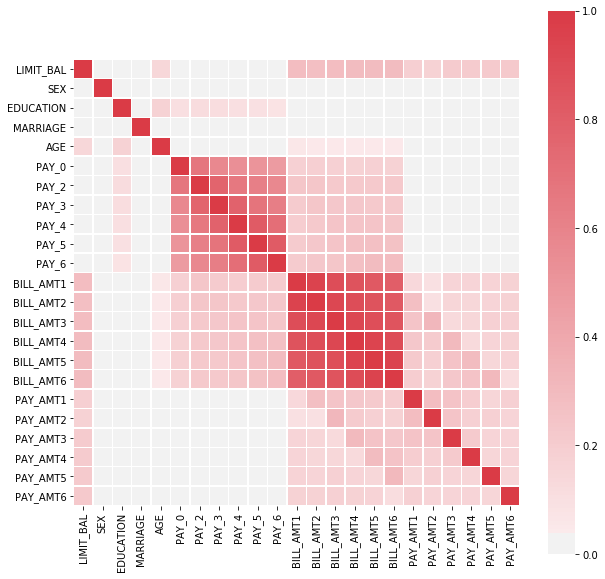

In [465]:
corrf = features.corr()
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrf, cmap=cmap, vmin=0, vmax=1, center=0, square=True, linewidth=0.5)

In [466]:
# Now, working with Random Forest - Classification Algorithm

In [467]:
# Part II - Classification Algoritms

In [468]:
from sklearn.ensemble import RandomForestClassifier

In [469]:
from sklearn.datasets import make_classification

In [470]:
ClassifierRF = RandomForestClassifier(max_depth=2, random_state=0)

In [471]:
ClassifierRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [472]:
(cross_val_score(ClassifierRF, X_train, y_train))

array([0.80695907, 0.8104    , 0.80744099])

In [473]:
ClassifierRF.score(X_test, y_test)

0.8104

In [474]:
predictions_ClassifierRF = ClassifierRF.predict(X_test)

In [475]:
from sklearn.metrics import cohen_kappa_score

In [476]:
cohen_kappa_score(y_test, predictions_ClassifierRF)

0.2822942358099174

In [477]:
from sklearn.metrics import confusion_matrix

In [478]:
confusion_matrix(y_test, predictions_ClassifierRF)

array([[5671,  168],
       [1254,  407]], dtype=int64)

In [479]:
import matplotlib.pyplot as plt

In [480]:
#AdaBoost Classifier

In [481]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [482]:
ClassifierADA = AdaBoostClassifier(n_estimators=100)

In [483]:
scores = cross_val_score(ClassifierADA, X_train, y_train, cv=5)

In [484]:
scores.mean()

0.8168888888888889

In [485]:
ClassifierADA.fit(X_test, y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [486]:
ClassifierADA.score(X_test, y_test)

0.8288

In [487]:
predictions_ClassifierADA = ClassifierADA.predict(X_test)

In [488]:
cohen_kappa_score(y_test, predictions_ClassifierADA)

0.40818634988883373

In [489]:
confusion_matrix(y_test, predictions_ClassifierADA)

array([[5571,  268],
       [1016,  645]], dtype=int64)

In [490]:
# Evaluation of the Gradient Boosting Tree Algorithm

In [491]:
from sklearn.ensemble import GradientBoostingClassifier

In [492]:
ClassifierGB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [493]:
scores = cross_val_score(ClassifierGB, X_train, y_train, cv=5)

In [494]:
scores.mean()

0.8161333333333334

In [495]:
ClassifierGB.fit(X_test, y_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [496]:
(cross_val_score(ClassifierGB, X_train, y_train))

array([0.8157579 , 0.8152    , 0.81544206])

In [497]:
ClassifierGB.score(X_test, y_test)

0.8289333333333333

In [498]:
predictions_ClassifierGB = ClassifierGB.predict(X_test)

In [499]:
cohen_kappa_score(y_test, predictions_ClassifierGB)

0.4103127520993418

In [500]:
confusion_matrix(y_test, predictions_ClassifierGB)

array([[5566,  273],
       [1010,  651]], dtype=int64)

In [501]:
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [502]:
features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [503]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [504]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(23)
memory usage: 5.3 MB


In [506]:
#Just double checking if there are missing values

In [507]:
features.isnull().any()

LIMIT_BAL    False
SEX          False
EDUCATION    False
MARRIAGE     False
AGE          False
PAY_0        False
PAY_2        False
PAY_3        False
PAY_4        False
PAY_5        False
PAY_6        False
BILL_AMT1    False
BILL_AMT2    False
BILL_AMT3    False
BILL_AMT4    False
BILL_AMT5    False
BILL_AMT6    False
PAY_AMT1     False
PAY_AMT2     False
PAY_AMT3     False
PAY_AMT4     False
PAY_AMT5     False
PAY_AMT6     False
dtype: bool

In [508]:
# Know we will evaluate the K-Nearest Neighbor algorithm

In [509]:
from sklearn.neighbors import KNeighborsClassifier 

In [598]:
ClassifierKNN = KNeighborsClassifier(n_neighbors=24)

In [599]:
ClassifierKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=2,
           weights='uniform')

In [600]:
ClassifierKNN.score(X_test, y_test)

0.7758666666666667

In [601]:
predictions_ClassifierKNN = ClassifierKNN.predict(X_test)

In [602]:
cohen_kappa_score(y_test, predictions_ClassifierKNN)

0.06567121527735575

In [603]:
confusion_matrix(y_test, predictions_ClassifierKNN)

array([[5705,  134],
       [1547,  114]], dtype=int64)

In [522]:
# we can explore finding the optimal number of neighbors using GridSearchCV

In [523]:
from sklearn.model_selection import GridSearchCV

In [524]:
# we can initialize a grid with possible number of neighbots from 1 to 24

In [532]:
grid = {'n_neighbors':np.arange(1,25)}

In [533]:
knn_classifier = KNeighborsClassifier()

In [534]:
# we can now use cross validation to find the optimal number of neighbors 

In [535]:
from sklearn.neighbors import KNeighborsClassifier

In [541]:
knn = GridSearchCV(knn_classifier,grid, cv = 24)

In [542]:
knn.fit(X_train, y_train)

GridSearchCV(cv=24, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [543]:
# We can now extract the optimal number of neighbors

In [544]:
knn.best_params_

{'n_neighbors': 24}

In [540]:
knn.best_score_

0.7808

In [545]:
knn.score(X_test, y_test)

0.7758666666666667

In [546]:
# Standardization

In [547]:
from sklearn.preprocessing import StandardScaler

In [548]:
from sklearn.pipeline import Pipeline

In [549]:
# Now we configure the scaling pipeline

In [552]:
pipeline_order = {('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=1))}

In [553]:
pipeline = Pipeline(pipeline_order)

In [554]:
knn_classifier_scaled = pipeline.fit(X_train, y_train)

In [555]:
knn_classifier_scaled.score(X_test, y_test)

0.7294666666666667

In [556]:
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64


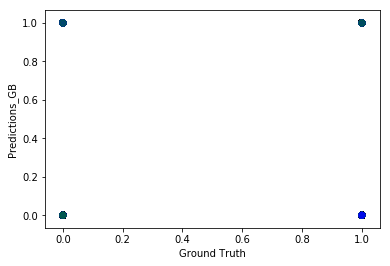

In [557]:
plt.scatter(y_test, predictions_ClassifierGB, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions_GB')
plt.show();

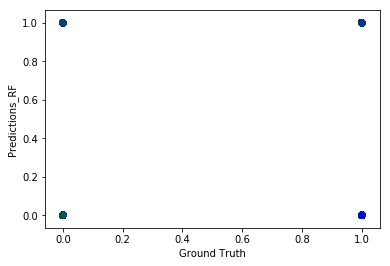

In [558]:
plt.scatter(y_test, predictions_ClassifierRF, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions_RF')
plt.show();

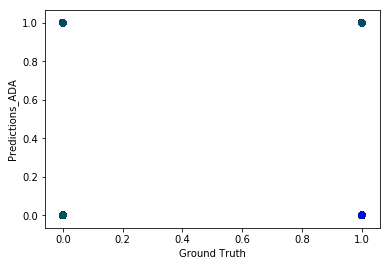

In [559]:
plt.scatter(y_test, predictions_ClassifierADA, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions_ADA')
plt.show();

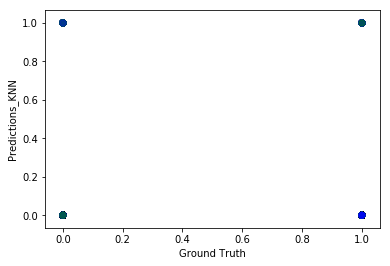

In [560]:
plt.scatter(y_test, predictions_ClassifierKNN, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions_KNN')
plt.show();

In [563]:
#Review - Summary

In [564]:
print(cross_val_score(modelRF, X_train, y_train)) 

[0.12162468 0.11519447 0.10591448]


In [565]:
print(cross_val_score(modelSVR, X_train, y_train)) 

[-0.01969368 -0.02243776 -0.01672056]


In [566]:
print(cross_val_score(modelLR, X_train, y_train)) 

[0.12312245 0.11677973 0.11192274]


In [567]:
print(cross_val_score(modelNB, X_train, y_train)) 

[0.40834555 0.36346667 0.39365249]


In [568]:
print(cross_val_score(ClassifierRF, X_train, y_train)) 

[0.80695907 0.8104     0.80744099]


In [570]:
print(cross_val_score(ClassifierADA, X_train, y_train)) 

[0.81455806 0.81573333 0.81330844]


In [572]:
print(cross_val_score(ClassifierGB, X_train, y_train)) 

[0.8157579  0.8152     0.81544206]


In [573]:
print(cross_val_score(ClassifierKNN, X_train, y_train)) 

[0.77589655 0.77706667 0.77583678]


In [580]:
#We can evaluate the weight of the prediction by each variable - it seems that a tabular format is more effective than a graphical approach in this case

In [ ]:
# We start with the Random Forest algorithm

In [579]:
print("-------------")
TP = np.sum(np.logical_and(predictions_ClassifierRF == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions_ClassifierRF == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions_ClassifierRF == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions_ClassifierRF == 0, y_test == 1))
pred = len(predictions_ClassifierRF)

-------------


In [581]:
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

True Positives: 407
False Positive: 168
True Negative: 5671
False Negative: 1254
Precision: 0.71
Recall: 0.25
Problematic ratio: 0.75


In [584]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(ClassifierRF, features)

,feat,score
5,"(P, A, Y, _, 0)",0.372411
6,"(P, A, Y, _, 2)",0.204750
8,"(P, A, Y, _, 4)",0.169798
9,"(P, A, Y, _, 5)",0.106391
10,"(P, A, Y, _, 6)",0.079077
0,"(L, I, M, I, T, _, B, A, L)",0.019086
7,"(P, A, Y, _, 3)",0.015381
19,"(P, A, Y, _, A, M, T, 3)",0.008637
18,"(P, A, Y, _, A, M, T, 2)",0.006961
22,"(P, A, Y, _, A, M, T, 6)",0.006447


In [585]:
print(get_feature_importance(ClassifierRF, features))

                           feat     score
5               (P, A, Y, _, 0)  0.372411
6               (P, A, Y, _, 2)  0.204750
8               (P, A, Y, _, 4)  0.169798
9               (P, A, Y, _, 5)  0.106391
10              (P, A, Y, _, 6)  0.079077
0   (L, I, M, I, T, _, B, A, L)  0.019086
7               (P, A, Y, _, 3)  0.015381
19     (P, A, Y, _, A, M, T, 3)  0.008637
18     (P, A, Y, _, A, M, T, 2)  0.006961
22     (P, A, Y, _, A, M, T, 6)  0.006447
2   (E, D, U, C, A, T, I, O, N)  0.004484
20     (P, A, Y, _, A, M, T, 4)  0.002367
17     (P, A, Y, _, A, M, T, 1)  0.001681
12  (B, I, L, L, _, A, M, T, 2)  0.001156
15  (B, I, L, L, _, A, M, T, 5)  0.001015
16  (B, I, L, L, _, A, M, T, 6)  0.000359
4                     (A, G, E)  0.000000
1                     (S, E, X)  0.000000
13  (B, I, L, L, _, A, M, T, 3)  0.000000
14  (B, I, L, L, _, A, M, T, 4)  0.000000
3      (M, A, R, R, I, A, G, E)  0.000000
21     (P, A, Y, _, A, M, T, 5)  0.000000
11  (B, I, L, L, _, A, M, T, 1)  0

In [586]:
# Now, we can evaluate the Gradient Boost algorithm - variable = Classifier GB

In [587]:
print("-------------")
TP = np.sum(np.logical_and(predictions_ClassifierGB == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions_ClassifierGB == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions_ClassifierGB == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions_ClassifierGB == 0, y_test == 1))
pred = len(predictions_ClassifierGB)

-------------


In [588]:
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

True Positives: 651
False Positive: 273
True Negative: 5566
False Negative: 1010
Precision: 0.7
Recall: 0.39
Problematic ratio: 0.61


In [589]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(ClassifierGB, features)

,feat,score
5,"(P, A, Y, _, 0)",0.12
17,"(P, A, Y, _, A, M, T, 1)",0.09
11,"(B, I, L, L, _, A, M, T, 1)",0.08
14,"(B, I, L, L, _, A, M, T, 4)",0.07
12,"(B, I, L, L, _, A, M, T, 2)",0.07
19,"(P, A, Y, _, A, M, T, 3)",0.06
4,"(A, G, E)",0.06
6,"(P, A, Y, _, 2)",0.05
7,"(P, A, Y, _, 3)",0.05
18,"(P, A, Y, _, A, M, T, 2)",0.04


In [590]:
# ADA algorithm - variable ClassifierADA

In [591]:
print("-------------")
TP = np.sum(np.logical_and(predictions_ClassifierADA == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions_ClassifierADA == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions_ClassifierADA == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions_ClassifierADA == 0, y_test == 1))
pred = len(predictions_ClassifierADA)

-------------


In [592]:
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

True Positives: 645
False Positive: 268
True Negative: 5571
False Negative: 1016
Precision: 0.71
Recall: 0.39
Problematic ratio: 0.61


In [593]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(ClassifierADA, features)

,feat,score
19,"(P, A, Y, _, A, M, T, 3)",0.12
12,"(B, I, L, L, _, A, M, T, 2)",0.10
5,"(P, A, Y, _, 0)",0.08
21,"(P, A, Y, _, A, M, T, 5)",0.07
17,"(P, A, Y, _, A, M, T, 1)",0.07
14,"(B, I, L, L, _, A, M, T, 4)",0.07
11,"(B, I, L, L, _, A, M, T, 1)",0.06
18,"(P, A, Y, _, A, M, T, 2)",0.06
22,"(P, A, Y, _, A, M, T, 6)",0.05
4,"(A, G, E)",0.05


In [594]:
# KNN algorithms --> ClassifierKNN

In [595]:
print("-------------")
TP = np.sum(np.logical_and(predictions_ClassifierKNN == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions_ClassifierKNN == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions_ClassifierKNN == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions_ClassifierKNN == 0, y_test == 1))
pred = len(predictions_ClassifierKNN)

-------------


In [596]:
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

True Positives: 138
False Positive: 196
True Negative: 5643
False Negative: 1523
Precision: 0.41
Recall: 0.08
Problematic ratio: 0.92


In [604]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(ClassifierKNN, features)

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'